# How to Visualize Data in Python

## Learning Objectives
When exploring data, one of the most important things we can do is visualize it so we can better understand it. Like the popular saying "*A picture is worth a thousand words*”, visualizations are sometimes more useful than summary statistics in helping us understand our data. This is because visualizations are a great tool for asking and answering questions about data. Depending on the type of question we are trying to answer, there are four major types of visualizations we could use. They are relationship, distribution, comparison and composition. By the end of this tutorial, you will have learned: 

+ how to create a relationship visualization
+ how to create a distribution visualization
+ how to create a comparison visualization
+ how to create a composition visualization

In [1]:
# To ensure that the plots we create in this tutorial appear right after our code, 
# we have to run the following command. 
%matplotlib inline

Let's import and preview the data we will use to illustrate how to visualize data.

In [2]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


## How to create a Relationship Visualization

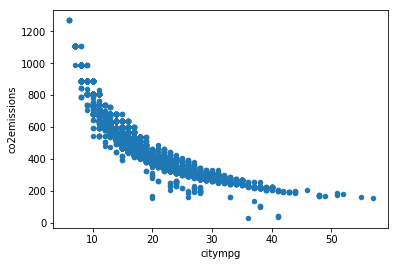

In [5]:
#  These types of visualizations are used to illustrate the correlation between two or more continuous variables. 
# Scatter plots are one of the most commonly used relationship visualizations. 
# They show how one variable changes in response to a change in another. 

vehicles.plot(kind = 'scatter', x = 'citympg', y = 'co2emissions')

# The plot that we have shows that the relationship between vehicle emissions levels and city mileage is negative. 
# In other words, vehicles with higher mileage ratings emit less carbon.

## How to create a Distribution Visualization

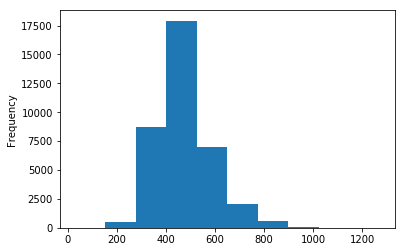

In [6]:
# distribution visualizations illustrate this statistical distribution of the values of a feature. 
# One of the most commonly used distribution visualizations is the histogram. 
# With a histogram, we can figure out which values are most common for a feature.

vehicles['co2emissions'].plot(kind = 'hist')

# The plot shows that the carbon emissions values for the vehicles in the dataset range from just on the 200 grams 
# per mile, to just over a thousand grams per mile. It also shows a most vehicles fall within the 300 to 700 grams 
# per mile range.

## How to create a Comparision Visualization

In [ ]:
# Comparison visualizations are used to illustrate the difference between two or more items at a given point 
# in time or over a period of time. One of the most commonly used comparison visualizations is the box plot. 
# Using a box plot, we can compare the distribution of values for a continuous feature against the values of a 
# categorical feature.

In [8]:
# To create a box plot in Python, we must first create a pivot table, such that the value we want on the X axis 
# of our plot are listed as column labels while the values we want on the Y axis of our plot are the cell values. 
# To create the pivot table, we begin with our vehicles dataset. We call the pivot method. Within the method, 
# we specify a value for the columns. Here we specify the value as drive, and we specify a value for the cells, 
# which is the values argument and we specify this as CO2 emissions.

vehicles.pivot(columns = 'drive', values = 'co2emissions')

# the value NAN is an acronym for not a number and is how a pandas dataframe represents missing values. 
# The emissions values are missing for every column except the one that corresponds with a drive type for a 
# particular vehicle. For example, we can tell that the first vehicle in our table is a two wheel drive vehicle 
# while the fourth one is a rare wheel drive vehicle. 

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
0,555.437500,NaN,NaN,NaN,NaN
1,555.437500,NaN,NaN,NaN,NaN
2,484.761905,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,424.166667
4,NaN,NaN,NaN,NaN,555.437500
...,...,...,...,...,...
36974,NaN,NaN,NaN,NaN,442.000000
36975,NaN,NaN,NaN,NaN,466.000000
36976,NaN,NaN,NaN,NaN,503.000000
36977,NaN,NaN,NaN,NaN,661.000000


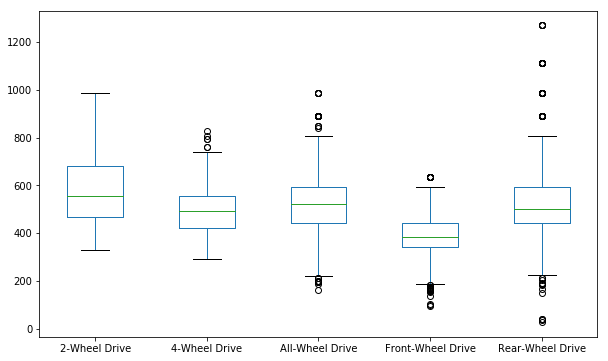

In [13]:
vehicles.pivot(columns = 'drive', values = 'co2emissions').plot(kind = 'box', figsize = (10,6))

# The plot shows that on average front wheel drive cars have lower carbon emissions than other types of cars.

## How to create a Composition Visualization

In [15]:
# These types of visualizations show the component makeup of data. 
# Stacked bar charts are one of the most commonly used composition visualizations. 
# Stacked bar charts show how much a subgroup contributes to the whole. 

In [16]:
# To create a stacked bar chart in Python, we must first create a pivot table so that the values we want 
# on the X axis of our plot are listed as row labels while the composite groups are listed as column labels.
# To do this, we start with a group level aggregation.

vehicles.groupby('year')['drive'].value_counts()

year  drive            
1984  2-Wheel Drive        477
      All-Wheel Drive      301
      Rear-Wheel Drive       4
1985  Rear-Wheel Drive     772
      Front-Wheel Drive    672
                          ... 
2017  4-Wheel Drive        173
2018  All-Wheel Drive      245
      Rear-Wheel Drive     230
      Front-Wheel Drive    193
      4-Wheel Drive        124
Name: drive, Length: 123, dtype: int64

In [18]:
# The next thing we do is call the unstack method to pivot that innermost index, 
# which is drive to column labels, unstack. 

vehicles.groupby('year')['drive'].value_counts().unstack()

# Now that our data is in this format, we can create a stat bar chart.

drive,2-Wheel Drive,4-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Rear-Wheel Drive
year,,,,,
1984,477.0,NaN,301.0,NaN,4.0
1985,NaN,NaN,255.0,672.0,772.0
1986,NaN,1.0,202.0,430.0,576.0
1987,NaN,NaN,220.0,470.0,557.0
1988,NaN,NaN,215.0,447.0,468.0
1989,NaN,NaN,227.0,445.0,480.0
1990,NaN,NaN,241.0,422.0,413.0
1991,NaN,NaN,243.0,431.0,456.0
1992,NaN,NaN,232.0,455.0,432.0


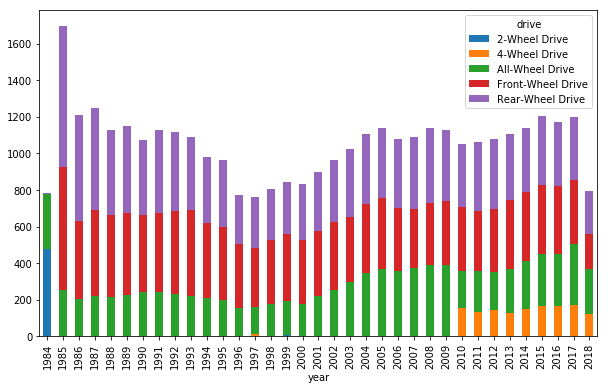

In [21]:
vehicles.groupby('year')['drive'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6))

# The plot shows the total number of vehicles rated by the EPA each year, 
# as well as the proportion of front wheel, all wheel, and rear wheel vehicles that make up those numbers.